# Moduel 7.5: Practice Notebook on Module 07 Data Preprocessing and Feature Engineering

In the previous practice day (6.5), you had already chosen **one dataset** from the list below and repeated the full EDA steps you learned in Module 06. For today’s practice (7.5), you will work on the topics you learned in Module 07: Data Preprocessing and Feature Engineering.

## Dataset Options (Choose One)

1. E-Commerce Fraud Detection Dataset  
   https://www.kaggle.com/datasets/umuttuygurr/e-commerce-fraud-detection-dataset  

2. BreastDataset  
   https://www.kaggle.com/datasets/khansaafreen/breastdataset  

3. Titanic Dataset  
   https://www.kaggle.com/datasets/yasserh/titanic-dataset  

4. Loan Approval Dataset  
   https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset  

5. Diabetes Health Indicators Dataset  
   https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset  

6. Alzheimer’s Disease Dataset  
   https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset  

7. Students Performance Dataset  
   https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset  

8. Cancer Data  
   https://www.kaggle.com/datasets/erdemtaha/cancer-data  

9. Mushroom Classification  
   https://www.kaggle.com/datasets/uciml/mushroom-classification  

10. Rain in Australia  
   https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package  

---


## Section 13 — Handling Missing Values

In [ ]:
import pandas as pd
df_titanic = pd.read_csv('/content/Titanic-Dataset.csv')
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# TODO
# Find Missing Values of your Dataset
# Identify which way you should impute those missing values
# Apply the methods to impute missing values

In [ ]:
df_titanic.shape

(891, 12)

In [ ]:
df_titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


cabin er moddeh null value onak jeita data set er 70% so cabin ta data set theke bat dia jai

Distribution of Age Column:


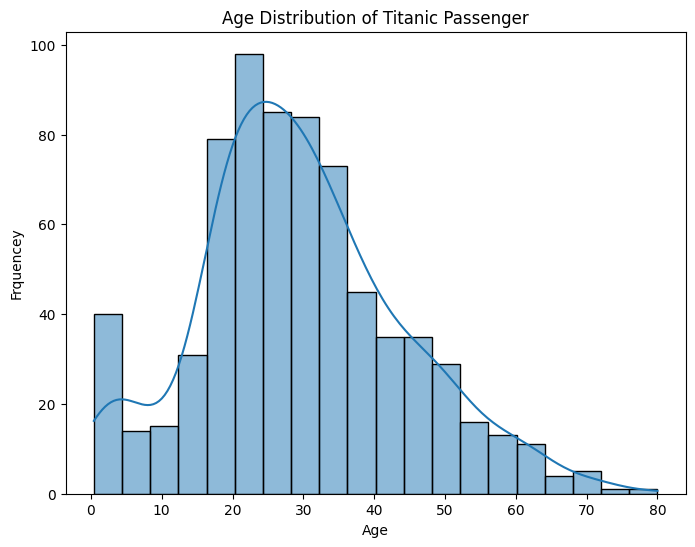

In [ ]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.histplot(df_titanic['Age'], kde = True , bins = 20)
plt.title("Age Distribution of Titanic Passenger")
plt.xlabel("Age")
plt.ylabel("Frquencey")
plt.show()



Age ta right right skewed so amra eikhane median use korte parbu

Distribution of Embarked	 Column:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


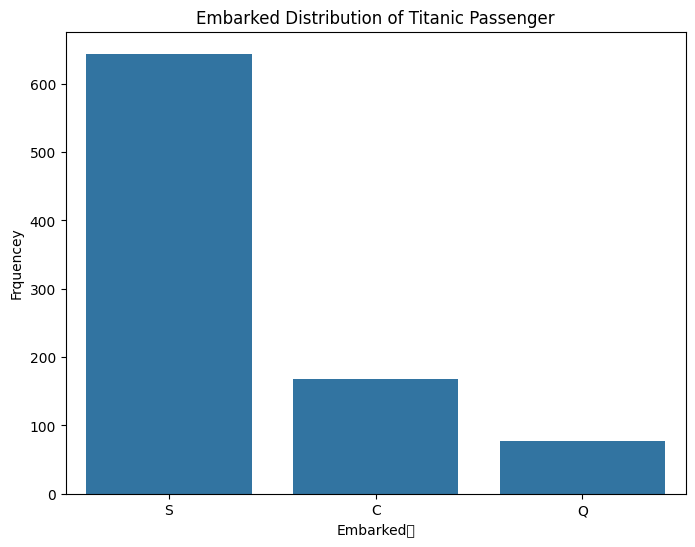

In [ ]:
print("Distribution of Embarked	 Column:")
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.countplot(data = df_titanic, x = "Embarked")
plt.title("Embarked Distribution of Titanic Passenger")
plt.xlabel("Embarked	")
plt.ylabel("Frquencey")
plt.show()



:Categorical value or jonnu Mode use korte parbu

In [ ]:
age_median = df_titanic['Age'].median()
df_titanic['Age'] = df_titanic['Age'].fillna(age_median)

Embarked_mode = df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(Embarked_mode)

df_titanic.drop(columns=['Cabin'], inplace=True)

df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Section 14 — Encoding Categorical Variables

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df_titanic.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
# TODO
# Identify categorical features
# Take decision on what encoding will you apply for each categorical features
# Apply the methods to encode the features and show final data

In [ ]:
df_titanic.drop(columns=['Name','Ticket'], inplace=True)
df_titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


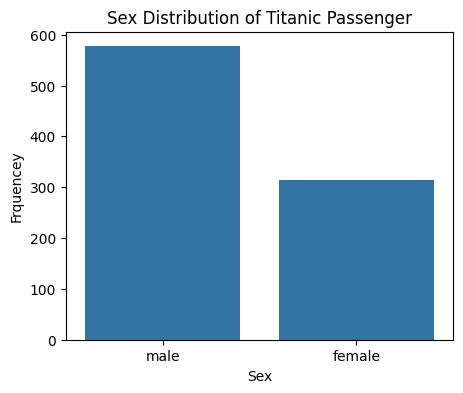

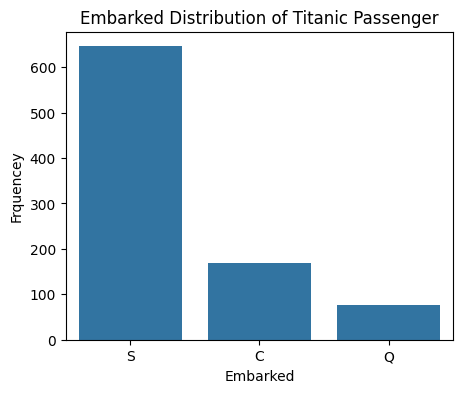

In [ ]:
categorical_cols = ['Sex','Embarked']
for c in categorical_cols:
   plt.figure(figsize=(5,4))
   sns.countplot(data = df_titanic, x = c)
   plt.title(f"{c} Distribution of Titanic Passenger")
   plt.xlabel(c)
   plt.ylabel("Frquencey")
   plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
df_titanic["Sex"] = le.fit_transform(df_titanic["Sex"])
print("Label Encoding applied to 'Sex' column successfully.")

Label Encoding applied to 'Sex' column successfully.


In [ ]:
df_titanic.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
5,6,0,3,1,28.0,0,0,8.4583,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,1
7,8,0,3,1,2.0,3,1,21.0750,0,1
8,9,1,3,0,27.0,0,2,11.1333,0,1
9,10,1,2,0,14.0,1,0,30.0708,0,0


In [ ]:
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], drop_first=True)
print("One-Hot Encoding applied to 'Embarked' column successfully.")

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
5,6,0,3,1,28.0,0,0,8.4583,True,False
6,7,0,1,1,54.0,0,0,51.8625,False,True
7,8,0,3,1,2.0,3,1,21.0750,False,True
8,9,1,3,0,27.0,0,2,11.1333,False,True
9,10,1,2,0,14.0,1,0,30.0708,False,False


In [ ]:
df_titanic['Embarked_S'] = df_titanic['Embarked_S'].astype(int)
df_titanic['Embarked_Q'] = df_titanic['Embarked_Q'].astype(int)


In [ ]:
df_titanic.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
5,6,0,3,1,28.0,0,0,8.4583,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,1
7,8,0,3,1,2.0,3,1,21.0750,0,1
8,9,1,3,0,27.0,0,2,11.1333,0,1
9,10,1,2,0,14.0,1,0,30.0708,0,0


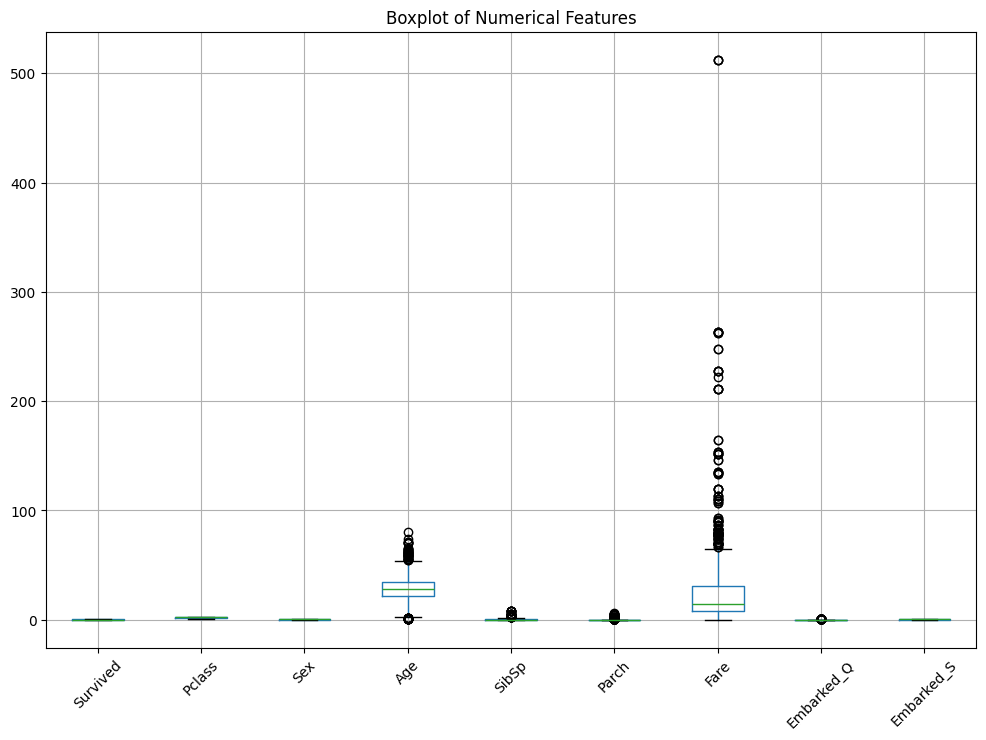

In [ ]:

numeric_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
plt.figure(figsize=(12,8))
df_titanic[numeric_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


In [ ]:
for c in numeric_cols:
    mn = df_titanic[c].min()
    mx = df_titanic[c].max()
    print(f"Min value of {c} is {mn}")
    print(f"Max value of {c} is {mx}")
    print('\n')



Min value of Survived is 0
Max value of Survived is 1


Min value of Pclass is 1
Max value of Pclass is 3


Min value of Sex is 0
Max value of Sex is 1


Min value of Age is 0.42
Max value of Age is 80.0


Min value of SibSp is 0
Max value of SibSp is 8


Min value of Parch is 0
Max value of Parch is 6


Min value of Fare is 0.0
Max value of Fare is 512.3292


Min value of Embarked_Q is 0
Max value of Embarked_Q is 1


Min value of Embarked_S is 0
Max value of Embarked_S is 1




## Section 15 — Normalization and Scaling

In [ ]:
# TODO
# Check if your dataset have features with different range of values or not
# Take decision on whether scaling is required or not
# If required apply one of the scaling method

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler





In [ ]:
# Assume df_titanic is our working dataframe with target 'Survived'
target_col = 'Survived'
X = df_titanic.drop(columns=[target_col])
y = df_titanic[target_col]

x_train , x_test, y_train, y_test = train_test_split(X,y , test_size = .25 , random_state = 42)
# Standard Scaling
scaler_sd = StandardScaler()
#amra always train value er opor mean and sd ba scaler fit korbu
x_train_sd = scaler_sd.fit_transform(x_train)#mean sd ei golo just calculate hobe x_train value theke and oita train value and test value 2ta te scale korar time use hove
x_test_sd = scaler_sd.transform(x_test)

print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_sd_df = pd.DataFrame(x_train_sd,column = x_train.columns , index = x_train.index)
x_test_sd_df = pd.DataFrame(x_test_sd,column = x_test.columns , index = x_test.index)

print(x_train_sd_df.head())
print(x_test_sd_df.head())


--- Displaying Standard Scaled Data ---


TypeError: DataFrame.__init__() got an unexpected keyword argument 'column'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Assume df_titanic is our working dataframe with target 'Survived'
target_col = 'Survived'
X = df_titanic.drop(columns=[target_col])
y = df_titanic[target_col]

x_train , x_test, y_train, y_test = train_test_split(X,y , test_size = .25 , random_state = 42)
# Standard Scaling
scaler_sd = StandardScaler()
#amra always train value er opor mean and sd ba scaler fit korbu
x_train_sd = scaler_sd.fit_transform(x_train)#mean sd ei golo just calculate hobe x_train value theke and oita train value and test value 2ta te scale korar time use hove
x_test_sd = scaler_sd.transform(x_test)

print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_sd_df = pd.DataFrame(x_train_sd,columns = x_train.columns , index = x_train.index)
x_test_sd_df = pd.DataFrame(x_test_sd,columns = x_test.columns , index = x_test.index)

display(x_train_sd_df.head())
display(x_test_sd_df.head())


--- Displaying Standard Scaled Data ---


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
298,-0.575735,-1.620517,0.722247,-0.087648,-0.467660,-0.468878,-0.032568,-0.308354,0.595793
884,1.696946,0.809349,0.722247,-0.318203,-0.467660,-0.468878,-0.487331,-0.308354,0.595793
247,-0.773529,-0.405584,-1.384569,-0.395055,-0.467660,2.046870,-0.342854,-0.308354,0.595793
478,0.122358,0.809349,0.722247,-0.548758,-0.467660,-0.468878,-0.478201,-0.308354,0.595793
305,-0.548587,-1.620517,0.722247,-2.168793,0.376656,2.046870,2.314937,-0.308354,0.595793


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,1.018244,0.809349,0.722247,-0.087648,0.376656,0.788996,-0.328391,-0.308354,-1.678435
439,-0.028896,-0.405584,0.722247,0.142907,-0.467660,-0.468878,-0.420425,-0.308354,0.595793
840,1.526301,0.809349,0.722247,-0.702462,-0.467660,-0.468878,-0.470362,-0.308354,0.595793
720,1.060906,-0.405584,-1.384569,-1.778386,-0.467660,0.788996,0.015914,-0.308354,0.595793
39,-1.580214,0.809349,-1.384569,-1.163572,0.376656,-0.468878,-0.406042,-0.308354,-1.678435


In [ ]:
# MinMax Scaling
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train)
x_test_mm = scaler_mm.transform(x_test)
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_mm_df = pd.DataFrame(x_train_mm,columns = x_train.columns , index = x_train.index)
x_test_mm_df = pd.DataFrame(x_test_mm,columns = x_test.columns , index = x_test.index)

display(x_train_mm_df.head())
display(x_test_mm_df.head())


--- Displaying Standard Scaled Data ---


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
298,0.334831,0.0,1.0,0.346569,0.000,0.000000,0.059532,0.0,1.0
884,0.993258,1.0,1.0,0.308872,0.000,0.000000,0.013761,0.0,1.0
247,0.277528,0.5,0.0,0.296306,0.000,0.333333,0.028302,0.0,1.0
478,0.537079,1.0,1.0,0.271174,0.000,0.000000,0.014680,0.0,1.0
305,0.342697,0.0,1.0,0.006283,0.125,0.333333,0.295806,0.0,1.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,0.796629,1.0,1.0,0.346569,0.125,0.166667,0.029758,0.0,0.0
439,0.493258,0.5,1.0,0.384267,0.000,0.000000,0.020495,0.0,1.0
840,0.943820,1.0,1.0,0.246042,0.000,0.000000,0.015469,0.0,1.0
720,0.808989,0.5,0.0,0.070118,0.000,0.166667,0.064412,0.0,1.0
39,0.043820,1.0,0.0,0.170646,0.125,0.000000,0.021942,0.0,0.0


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
#robus scaler
scaler_rs = RobustScaler()
x_train_rs = scaler_rs.fit_transform(x_train)
x_test_rs = scaler_rs.transform(x_test)
print("\n--- Displaying Standard Scaled Data ---")
x_train_rs_df = pd.DataFrame(x_train_rs,columns = x_train.columns , index = x_train.index)
x_test_rs_df = pd.DataFrame(x_test_rs, colomns = x_test.columns , index = x_test.index)
display(x_train_rs_df.head())
display(x_test_rs_df.head())


--- Displaying Standard Scaled Data ---


TypeError: DataFrame.__init__() got an unexpected keyword argument 'colomns'

# Task
Correct the column name 'sex' to 'Sex' and apply Label Encoding to the 'Sex' column in `df_titanic`. Then, apply one-hot encoding to the 'Embarked' column in `df_titanic` using `pd.get_dummies`, dropping the first category. Finally, display the DataFrame's info and the first few rows of `df_titanic` to verify the successful encoding of 'Sex' and 'Embarked' columns into numerical representations.

## Correct Sex Column Encoding

### Subtask:
Correct the column name to 'Sex' and apply Label Encoding to the 'Sex' column.


**Reasoning**:
The previous code failed due to a KeyError because the column name 'Sex' was incorrectly typed as 'sex'. I will correct the column name to 'Sex' and re-apply Label Encoding to the 'Sex' column.



# Task
One-hot encode the 'Embarked' column in `df_titanic` using `pd.get_dummies` with `drop_first=True` and `dtype=int`, then display the DataFrame's info and the first few rows to verify the successful encoding and the updated DataFrame structure.

## Check for Embarked Column

### Subtask:
Verify the current columns in `df_titanic` to confirm the presence of the 'Embarked' column before attempting to encode it.


**Reasoning**:
To verify the presence of the 'Embarked' column, I need to display all columns of the `df_titanic` DataFrame.



# Task
Correct the `pd.DataFrame` constructor calls by changing the keyword `column` to `columns` for `x_train_sd_df` and `x_test_sd_df` to resolve the `TypeError`. Then, display the head of both `x_train_sd_df` and `x_test_sd_df` to verify that the standard scaling has been correctly applied and the scaled DataFrames are properly formed.

## Correct DataFrame Column Assignment

### Subtask:
Modify the `pd.DataFrame` constructor calls to use the `columns` keyword argument instead of `column` when creating `x_train_sd_df` and `x_test_sd_df`.


**Reasoning**:
The previous code failed because of a `TypeError` where `column` was used instead of `columns` in the `pd.DataFrame` constructor. I will correct this by changing `column` to `columns` for both `x_train_sd_df` and `x_test_sd_df` to ensure the DataFrame is created correctly with the appropriate column names.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Assume df_titanic is our working dataframe with target 'Survived'
target_col = 'Survived'
X = df_titanic.drop(columns=[target_col])
y = df_titanic[target_col]

x_train , x_test, y_train, y_test = train_test_split(X,y , test_size = .25 , random_state = 42)
# Standard Scaling
scaler_sd = StandardScaler()
#amra always train value er opor mean and sd ba scaler fit korbu
x_train_sd = scaler_sd.fit_transform(x_train)#mean sd ei golo just calculate hobe x_train value theke and oita train value and test value 2ta te scale korar time use hove
x_test_sd = scaler_sd.transform(x_test)

print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_sd_df = pd.DataFrame(x_train_sd,columns = x_train.columns , index = x_train.index)
x_test_sd_df = pd.DataFrame(x_test_sd,columns = x_test.columns , index = x_test.index)

display(x_train_sd_df.head())
display(x_test_sd_df.head())


--- Displaying Standard Scaled Data ---


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
298,-0.575735,-1.620517,0.722247,-0.087648,-0.467660,-0.468878,-0.032568,-0.308354,0.595793
884,1.696946,0.809349,0.722247,-0.318203,-0.467660,-0.468878,-0.487331,-0.308354,0.595793
247,-0.773529,-0.405584,-1.384569,-0.395055,-0.467660,2.046870,-0.342854,-0.308354,0.595793
478,0.122358,0.809349,0.722247,-0.548758,-0.467660,-0.468878,-0.478201,-0.308354,0.595793
305,-0.548587,-1.620517,0.722247,-2.168793,0.376656,2.046870,2.314937,-0.308354,0.595793


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,1.018244,0.809349,0.722247,-0.087648,0.376656,0.788996,-0.328391,-0.308354,-1.678435
439,-0.028896,-0.405584,0.722247,0.142907,-0.467660,-0.468878,-0.420425,-0.308354,0.595793
840,1.526301,0.809349,0.722247,-0.702462,-0.467660,-0.468878,-0.470362,-0.308354,0.595793
720,1.060906,-0.405584,-1.384569,-1.778386,-0.467660,0.788996,0.015914,-0.308354,0.595793
39,-1.580214,0.809349,-1.384569,-1.163572,0.376656,-0.468878,-0.406042,-0.308354,-1.678435


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# robust scaler
scaler_rs = RobustScaler()
x_train_rs = scaler_rs.fit_transform(x_train)
x_test_rs = scaler_rs.transform(x_test)
print("\n--- Displaying Robust Scaled Data ---")
x_train_rs_df = pd.DataFrame(x_train_rs,columns = x_train.columns , index = x_train.index)
x_test_rs_df = pd.DataFrame(x_test_rs, columns = x_test.columns , index = x_test.index)
display(x_train_rs_df.head())
display(x_test_rs_df.head())


--- Displaying Robust Scaled Data ---


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
298,-0.339790,-2.0,0.0,0.000000,0.0,0.0,0.713178,0.0,0.0
884,0.957388,0.0,0.0,-0.230769,0.0,0.0,-0.325581,0.0,0.0
247,-0.452684,-1.0,-1.0,-0.307692,0.0,2.0,0.004430,0.0,0.0
478,0.058661,0.0,0.0,-0.461538,0.0,0.0,-0.304726,0.0,0.0
305,-0.324294,-2.0,0.0,-2.083077,1.0,2.0,6.075305,0.0,0.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,0.570006,0.0,0.0,0.000000,1.0,1.0,0.037466,0.0,-1.0
439,-0.027670,-1.0,0.0,0.230769,0.0,0.0,-0.172757,0.0,0.0
840,0.859989,0.0,0.0,-0.615385,0.0,0.0,-0.286822,0.0,0.0
720,0.594355,-1.0,-1.0,-1.692308,0.0,1.0,0.823920,0.0,0.0
39,-0.913116,0.0,-1.0,-1.076923,1.0,0.0,-0.139903,0.0,-1.0


## Final Task

### Subtask:
Confirm that the standard scaling has been correctly applied and the scaled dataframes are properly formed.


## Summary:

### Q&A
Yes, the standard scaling has been correctly applied and the scaled DataFrames (`x_train_sd_df` and `x_test_sd_df`) are properly formed.

### Data Analysis Key Findings
*   The `TypeError` previously encountered due to using `column` instead of `columns` in the `pd.DataFrame` constructor was successfully resolved.
*   Both `x_train_sd_df` and `x_test_sd_df` were correctly formed after the correction, displaying the head of the DataFrames with scaled numerical values and their original column names (`PassengerId`, `Pclass`, `Sex`, `Age`, etc.).
*   The output confirmed that standard scaling was applied to the training and test datasets.

### Insights or Next Steps
*   This correction ensures that the scaled data retains its original column and index information, which is crucial for data interpretability and subsequent machine learning model training.
*   The properly formed scaled DataFrames are now ready for direct use in model training and evaluation phases, maintaining consistency with the original dataset structure.


# Task
Correct the typo `colomns` to `columns` in the `pd.DataFrame` constructor for `x_test_rs_df` after applying RobustScaler, then display the head of `x_train_rs_df` and `x_test_rs_df` to verify the robust scaling has been correctly applied and the scaled dataframes are properly formed.

## Correct DataFrame Column Assignment for RobustScaler

### Subtask:
Modify the `pd.DataFrame` constructor call for `x_test_rs_df` to use the correct `columns` keyword argument instead of `colomns`.


**Reasoning**:
The previous `code_cell` failed because of a `TypeError` due to a misspelled keyword `colomns` instead of `columns` in the `pd.DataFrame` constructor for `x_test_rs_df`. I will correct this typo and re-execute the code block to properly create the robust scaled dataframes.

